### Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Import other models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], 1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

#### APPLICATION_TYPE

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:xlabel='APPLICATION_TYPE'>

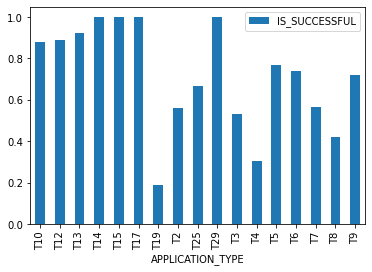

In [6]:
# Compare success rates for APPLICATION_TYPE values
success_app = application_df.groupby(["APPLICATION_TYPE"]).mean()["IS_SUCCESSFUL"]
success_app_df = pd.DataFrame(success_app)
success_app_df.plot(kind="bar")

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

#### AFFILIATION

In [8]:
# Look at AFFILIATION values
affiliation_counts = application_df["AFFILIATION"].value_counts()
affiliation_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

<AxesSubplot:xlabel='AFFILIATION'>

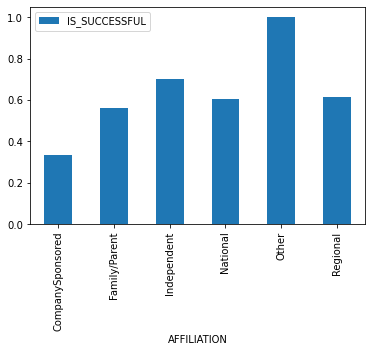

In [9]:
# Compare success rates for AFFLIATION values
success_aff = application_df.groupby(["AFFILIATION"]).mean()["IS_SUCCESSFUL"]
success_aff_df = pd.DataFrame(success_aff)
success_aff_df.plot(kind="bar")

In [10]:
# # Determine which values to replace if counts are less than ...?
# replace_affiliation = list(affiliation_counts[affiliation_counts < 1000].index)

# # Replace in dataframe
# for aff in replace_affiliation:
#     application_df.AFFILIATION = application_df.AFFILIATION.replace(aff,"Other")
    
# # Check to make sure binning was successful
# application_df.AFFILIATION.value_counts()

#### CLASSIFICATION

In [11]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts.array

<PandasArray>
[17326,  6074,  4837,  1918,  1883,   777,   287,   194,   116,   114,   104,
    95,    75,    58,    50,    36,    34,    32,    32,    30,    20,    18,
    16,    15,    15,    14,    11,    10,    10,     9,     9,     7,     6,
     6,     6,     5,     5,     3,     3,     3,     2,     2,     2,     2,
     2,     1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
     1,     1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
     1,     1,     1,     1,     1]
Length: 71, dtype: int64

In [12]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 100].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:xlabel='CLASSIFICATION'>

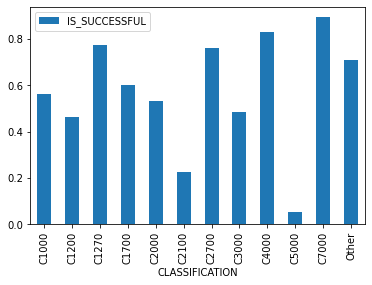

In [13]:
# Compare success rates for CLASSIFICATION values
success_class = application_df.groupby(["CLASSIFICATION"]).mean()["IS_SUCCESSFUL"]
success_class_df = pd.DataFrame(success_class)
success_class_df.plot(kind="bar")

#### USE CASE

In [14]:
# Look at USE_CASE values
use_counts = application_df["USE_CASE"].value_counts()
use_counts

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

<AxesSubplot:xlabel='USE_CASE'>

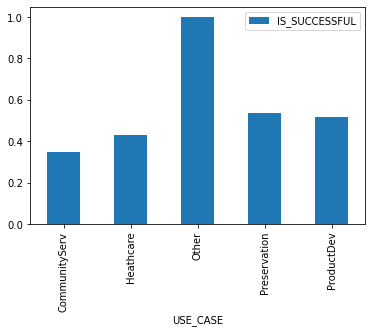

In [15]:
# Compare success rates for USE_CASE values
success_use = application_df.groupby(["USE_CASE"]).mean()["IS_SUCCESSFUL"]
success_use_df = pd.DataFrame(success_use)
success_use_df.plot(kind="bar")

In [16]:
# # Determine which values to replace if counts are less than ..?
# replace_use = list(use_counts[use_counts < 1000].index)

# # Replace in dataframe
# for use in replace_use:
#     application_df.USE_CASE = application_df.USE_CASE.replace(use,"Other")
    
# # Check to make sure binning was successful
# application_df.USE_CASE.value_counts()

#### ORGANIZATION

In [17]:
# Look at ORGANIZATION values
org_counts = application_df["ORGANIZATION"].value_counts()
org_counts

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

<AxesSubplot:xlabel='ORGANIZATION'>

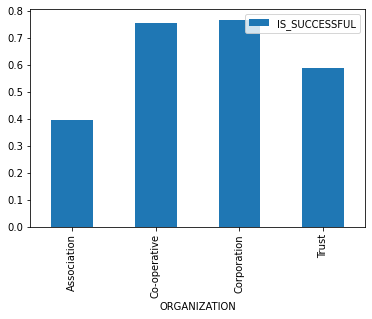

In [18]:
# Compare success rates for ORGANIZATION values
success_org = application_df.groupby(["ORGANIZATION"]).mean()["IS_SUCCESSFUL"]
success_org_df = pd.DataFrame(success_org)
success_org_df.plot(kind="bar")

In [19]:
# # Determine which values to replace if counts are less than ..?
# replace_org = list(org_counts[org_counts < 1000].index)

# # Replace in dataframe
# for org in replace_org:
#     application_df.ORGANIZATION = application_df.ORGANIZATION.replace(org,"Other")
    
# # Check to make sure binning was successful
# application_df.ORGANIZATION.value_counts()

#### STATUS

In [20]:
# Look at STATUS values
status_counts = application_df["STATUS"].value_counts()
status_counts

1    34294
0        5
Name: STATUS, dtype: int64

<AxesSubplot:xlabel='STATUS'>

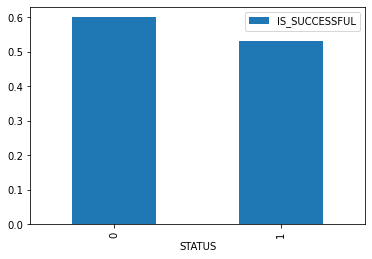

In [21]:
# Compare success rates for STATUS values
success_status = application_df.groupby(["STATUS"]).mean()["IS_SUCCESSFUL"]
success_status_df = pd.DataFrame(success_status)
success_status_df.plot(kind="bar")

In [22]:
# Remove STATUS column
# application_df = application_df.drop(columns=["STATUS"])

#### INCOME_AMT

In [23]:
# Look at INCOME_AMT values
income_counts = application_df["INCOME_AMT"].value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

<AxesSubplot:xlabel='INCOME_AMT'>

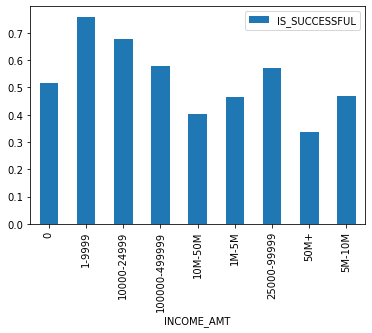

In [24]:
# Compare success rates for INCOME_AMT values
success_inc = application_df.groupby(["INCOME_AMT"]).mean()["IS_SUCCESSFUL"]
success_inc_df = pd.DataFrame(success_inc)
success_inc_df.plot(kind="bar")

<AxesSubplot:xlabel='INCOME_AMT'>

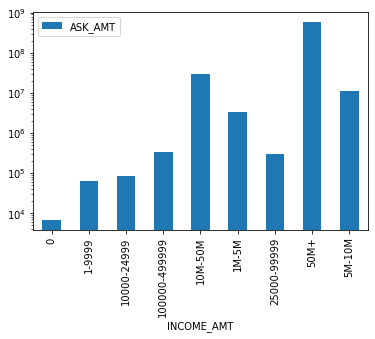

In [25]:
# Compare INCOME_AMT to ASK_AMT
avg_ask_by_income = application_df.groupby(["INCOME_AMT"]).mean()["ASK_AMT"]
avg_ask_by_income_df = pd.DataFrame(avg_ask_by_income, columns=["INCOME_AMT", "ASK_AMT"] )
avg_ask_by_income_df["INCOME_AMT"] = avg_ask_by_income_df.index
avg_ask_by_income_df.plot(kind="bar", x="INCOME_AMT", y="ASK_AMT", logy=True)

#### SPECIAL_CONSIDERATIONS

In [26]:
# Look at SPECIAL_CONSIDERATIONS values
sc_counts = application_df["SPECIAL_CONSIDERATIONS"].value_counts()
sc_counts

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

<AxesSubplot:xlabel='SPECIAL_CONSIDERATIONS'>

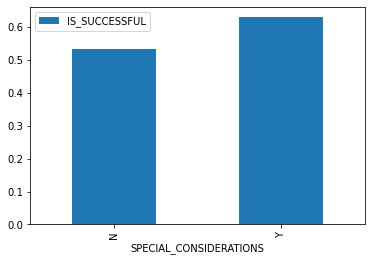

In [27]:
# Compare success rates for SPECIAL_CONSIDERATIONS values
success_sc = application_df.groupby(["SPECIAL_CONSIDERATIONS"]).mean()["IS_SUCCESSFUL"]
success_sc_df = pd.DataFrame(success_sc)
success_sc_df["SPECIAL_CONSIDERATIONS"] = success_sc_df.index
success_sc_df.plot(kind="bar", x="SPECIAL_CONSIDERATIONS", y="IS_SUCCESSFUL")

In [28]:
# Remove SPECIAL_CONSIDERATIONS column
# application_df = application_df.drop(columns=["SPECIAL_CONSIDERATIONS"])

#### ASK_AMT

<AxesSubplot:ylabel='Frequency'>

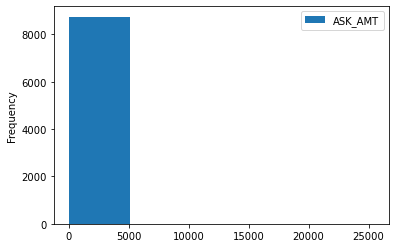

In [29]:
# Look at ASK_AMT values
ask_counts = application_df["ASK_AMT"].value_counts()
ask_counts_df = pd.DataFrame(ask_counts)
ask_counts_df.plot.hist(bins=5)

In [30]:
# Remove ASK_AMT column
application_df = application_df.drop(columns=["ASK_AMT"])

In [31]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [32]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
application_df.columns

Index(['STATUS', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8', 'APPLICATION_TYPE_T9',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C1270', 'CLASSIFICATION_C1700', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C2700', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_C4000', 'CLASSIFICATION_C5000', 'CLASSIFICATION_C7000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporatio

In [35]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=["IS_SUCCESSFUL", "SPECIAL_CONSIDERATIONS_N"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [36]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Compile, Train and Evaluate the Model

In [37]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_test_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 5
hidden_nodes_layer4 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Forth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                490       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 643
Trainable params: 643
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_opt/",exist_ok=True)
checkpoint_path = "checkpoints_opt/weights.{epoch:02d}.hdf5"

In [40]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5*804)

In [41]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=30, callbacks=[cp_callback])

Epoch 1/30
804/804 [==============================] - 2s 2ms/step - loss: 0.6218 - accuracy: 0.6759
Epoch 2/30
804/804 [==============================] - 1s 2ms/step - loss: 0.5666 - accuracy: 0.7238
Epoch 3/30
804/804 [==============================] - 1s 2ms/step - loss: 0.5600 - accuracy: 0.7269
Epoch 4/30
804/804 [==============================] - 1s 1ms/step - loss: 0.5551 - accuracy: 0.7290
Epoch 5/30
786/804 [============================>.] - ETA: 0s - loss: 0.5524 - accuracy: 0.7306
Epoch 00005: saving model to checkpoints_opt\weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5519 - accuracy: 0.7311
Epoch 6/30
804/804 [==============================] - 1s 1ms/step - loss: 0.5504 - accuracy: 0.7328
Epoch 7/30
804/804 [==============================] - 1s 1ms/step - loss: 0.5495 - accuracy: 0.7325
Epoch 8/30
804/804 [==============================] - 1s 2ms/step - loss: 0.5483 - accuracy: 0.7327
Epoch 9/30
804/804 [==============================] - 

In [42]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5559 - accuracy: 0.7226
Loss: 0.55592280626297, Accuracy: 0.7225655913352966


In [43]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

In [44]:
# # Create the SVM model
# svm = SVC(kernel='linear')

# # Train the model
# svm.fit(X_train_scaled, y_train)

# # Evaluate the model
# y_pred = svm.predict(X_test_scaled)
# print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

In [45]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.725
